In [25]:
# Library Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [26]:
# Load dataset

df = pd.read_csv('stroke_clean_data.csv')

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,1,80.0,0,1,1,2,0,105.92,32.5,2,1
2,0,49.0,0,0,1,2,1,171.23,34.4,3,1
3,0,79.0,1,0,1,3,0,174.12,24.0,2,1
4,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4903,0,13.0,0,0,0,4,0,103.08,18.6,0,0
4904,0,81.0,0,0,1,3,1,125.20,40.0,2,0
4905,0,35.0,0,0,1,3,0,82.99,30.6,2,0
4906,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [27]:
# Features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



In [30]:
# Random Forest Tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='f1', verbose=2)
grid_rf.fit(X_train, y_train)

print("Best Random Forest Params:", grid_rf.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END .max_depth=5, min_samples_split=5, n_es

In [31]:
# Logistic Regression Tuning
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=3, scoring='f1', verbose=2)
grid_lr.fit(X_train, y_train)

print("Best Logistic Regression Params:", grid_lr.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solve

In [32]:
# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.95       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.95      0.93       982



In [33]:
# Support Vector Machine
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print("SVM Report:\n", classification_report(y_test, y_pred_svc))


SVM Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


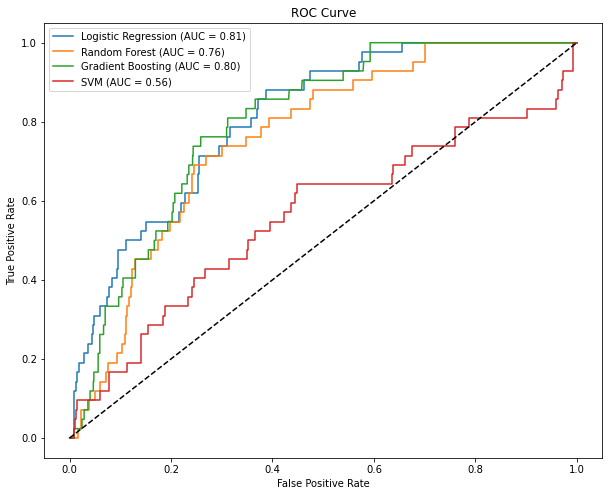

In [34]:
### Model Evaluation: ROC Curve
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    for name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

models = {
    'Logistic Regression': grid_lr.best_estimator_,
    'Random Forest': grid_rf.best_estimator_,
    'Gradient Boosting': gb,
    'SVM': svc
}

plot_roc_curve(models, X_test, y_test)

---

### **Interpretation of Each Model:**

1. **Logistic Regression (AUC = 0.81)**
- The best performance among all models.
- Able to distinguish positive and negative classes quite well.

2. **Gradient Boosting (AUC = 0.80)**
- Almost comparable to Logistic Regression.
- Suitable if you want a non-linear model with high performance.

3. **Random Forest (AUC = 0.76)**
- The performance is good, but still below the two models above.
- Can be too complex for limited datasets.

4. **SVM (AUC = 0.56)**
- Almost close to **random guessing (AUC = 0.5)**.
- Very **ineffective** for this data, likely due to:
- Inappropriate scaling or kernel
- Unaddressed data imbalance
- Too sensitive to outliers

---

### **Conclusion:**
- **Best models:** Logistic Regression and Gradient Boosting
- **Bad models:** SVM, likely not suitable for this dataset in its current state

---

### **Recommendations:**
1. **Choose Logistic Regression or Gradient Boosting** for the final model (depending on the trade-off: interpretability vs performance).
2. If you want more stable and non-linear results, **further tuning Gradient Boosting** may be a good choice. 
3. If you want to use **SVM** it seems you need to try:
- Feature scaling
- Try other kernels (RBF, polynomial)
- Hyperparameter adjustment (`C`, `gamma`)
4. Make sure to **test data balancing** and see if the AUC results can improve or the model becomes fairer to the minority class.